In [1]:
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel


## Split Data by average and year (After 1960, Votes number is bigger than 50.000 and avg_vote bigger than 7.0), This is our filter

In [2]:
split = pd.read_csv("dataset/IMDb movies.csv", low_memory=False)
df = pd.DataFrame(split)
i = df[(df.avg_vote < 7) | (df.year < "1960") | (df.votes < 50000)].index

df.drop(i).to_csv('data.csv', index=False)

In [3]:
movies = pd.read_csv("data.csv",low_memory=False)

### Top 250 Movies

In [4]:
sort_version=pd.read_csv("data.csv",low_memory=False )
sort_version.sort_values(by=['avg_vote'],inplace=True, ascending=False)
top250_movies = sort_version.head(250)

In [5]:
s = top250_movies['genre'].str.split(', ').apply(Series, 1).stack()
s.index = s.index.droplevel(-1)
s.name = 'genre'
del top250_movies['genre']
split_genres250 = top250_movies.join(s)
split_genres250

,imdb_title_id,title,original_title,year,date_published,duration,country,language,director,writer,...,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,genre
1,tt0053604,L'appartamento,The Apartment,1960,1960-10-06,125,USA,English,Billy Wilder,"Billy Wilder, I.A.L. Diamond",...,A man tries to rise in his company by letting ...,8.3,158999,$ 3000000,NaN,$ 177066,94.0,337.0,233.0,Comedy
1,tt0053604,L'appartamento,The Apartment,1960,1960-10-06,125,USA,English,Billy Wilder,"Billy Wilder, I.A.L. Diamond",...,A man tries to rise in his company by letting ...,8.3,158999,$ 3000000,NaN,$ 177066,94.0,337.0,233.0,Drama
1,tt0053604,L'appartamento,The Apartment,1960,1960-10-06,125,USA,English,Billy Wilder,"Billy Wilder, I.A.L. Diamond",...,A man tries to rise in his company by letting ...,8.3,158999,$ 3000000,NaN,$ 177066,94.0,337.0,233.0,Romance
2,tt0053779,La dolce vita,La dolce vita,1960,1960-02-04,174,"Italy, France","Italian, English, French, German",Federico Fellini,"Federico Fellini, Ennio Flaiano",...,A series of stories following a week in the li...,8.0,64595,NaN,NaN,$ 184376,95.0,195.0,156.0,Comedy
2,tt0053779,La dolce vita,La dolce vita,1960,1960-02-04,174,"Italy, France","Italian, English, French, German",Federico Fellini,"Federico Fellini, Ennio Flaiano",...,A series of stories following a week in the li...,8.0,64595,NaN,NaN,$ 184376,95.0,195.0,156.0,Drama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1533,tt8110330,Dil Bechara,Dil Bechara,2020,2020-07-24,101,India,Hindi,Mukesh Chhabra,"Shashank Khaitan, Suprotim Sengupta",...,The emotional journey of two hopelessly in lov...,8.8,101686,NaN,NaN,$ 42248,NaN,7639.0,30.0,Drama
1533,tt8110330,Dil Bechara,Dil Bechara,2020,2020-07-24,101,India,Hindi,Mukesh Chhabra,"Shashank Khaitan, Suprotim Sengupta",...,The emotional journey of two hopelessly in lov...,8.8,101686,NaN,NaN,$ 42248,NaN,7639.0,30.0,Romance
1535,tt8267604,Cafarnao - Caos e miracoli,Capharnaüm,2018,2019-04-11,126,"Lebanon, USA, France, Cyprus, Qatar, UK","Arabic, Amharic",Nadine Labaki,"Nadine Labaki, Jihad Hojeily",...,While serving a five-year sentence for a viole...,8.4,53506,$ 4000000,$ 1661096,$ 64417003,75.0,335.0,184.0,Drama
1538,tt8579674,1917,1917,2019,2020-01-23,119,"USA, UK, India, Spain, Canada, China","English, French, German",Sam Mendes,"Sam Mendes, Krysty Wilson-Cairns",...,"April 6th, 1917. As a regiment assembles to wa...",8.3,362897,$ 95000000,$ 159227644,$ 384857224,78.0,2843.0,474.0,Drama


### What are the genre numbers in Top-250 movies?

In [6]:
genre_counts = (pd.DataFrame(split_genres250.groupby('genre').original_title.nunique())).sort_values('genre', ascending=True)
genre_counts

,original_title
genre,
Action,55
Adventure,56
Animation,21
Biography,27
Comedy,44
Crime,55
Drama,183
Family,12
Fantasy,16


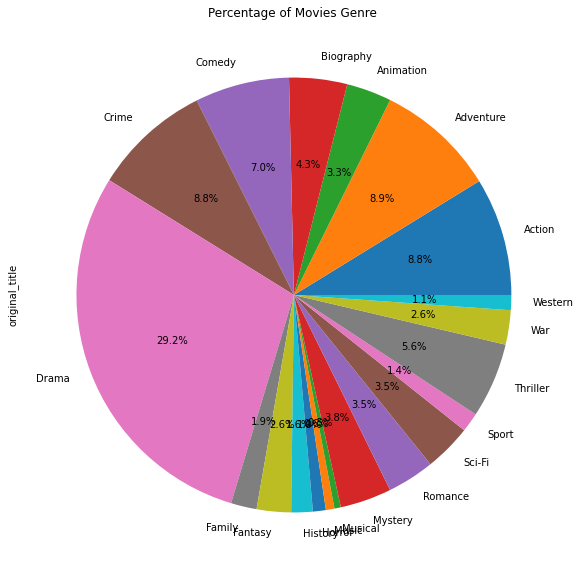

In [7]:
genre_counts['original_title'].plot.pie(title= 'Percentage of Movies Genre ' , figsize=(10,10), autopct='%1.1f%%',fontsize=10);

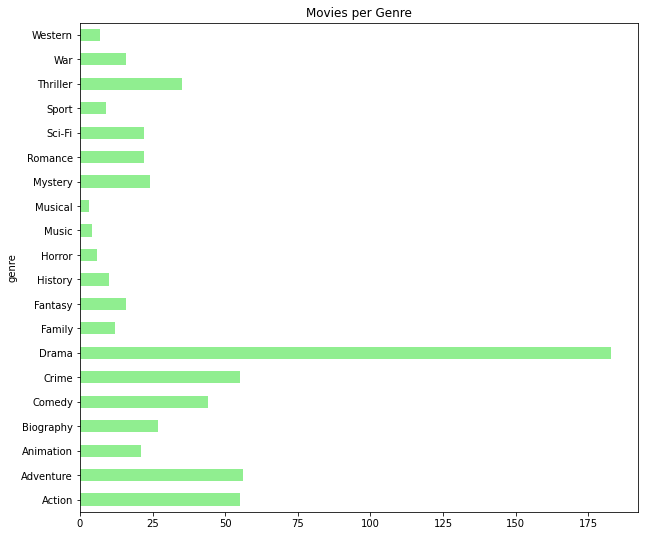

In [8]:
genre_counts['original_title'].plot.barh(title = 'Movies per Genre',color='LightGreen', figsize=(10, 9));

# Among the best 250 films determined by votes, there are films in the most drama genre. As it can be understood from here, Drama can be considered as the most liked movie genre.
## Action and Crime genres follow Drama genre.

#### Split genres in all movies

In [9]:
ex = movies['genre'].str.split(', ').apply(Series, 1).stack()
ex.index = ex.index.droplevel(-1)
ex.name = 'genre'
del movies['genre']
split_genres = movies.join(ex)

### What is the average vote density over the years? (All movies with our filters)

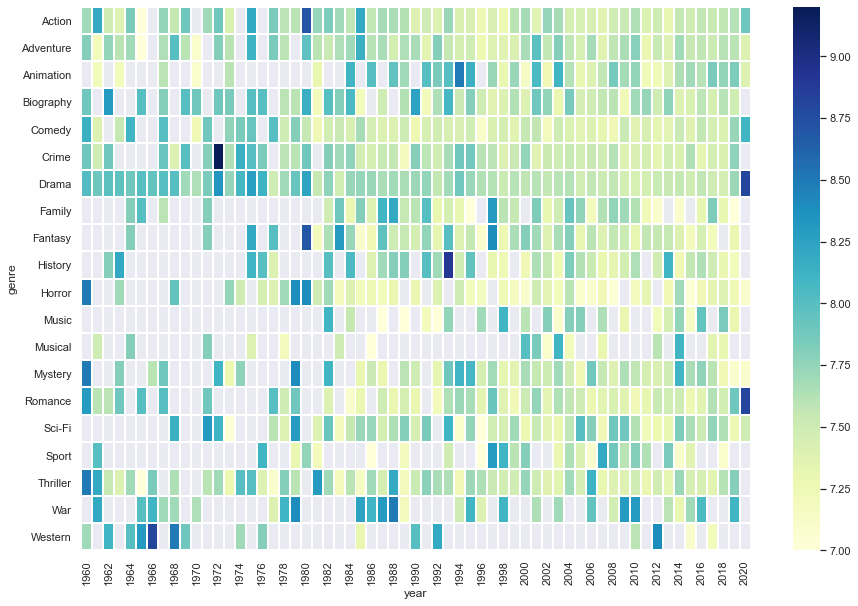

In [10]:
md_year_genre_vote_count = pd.DataFrame(split_genres.groupby(['year','genre'])['avg_vote'].mean())
md_heat_vote_count_pivot = pd.pivot_table(md_year_genre_vote_count, values='avg_vote', index=['genre'], columns=['year'])
sns.set(rc={'figure.figsize':(15,10)})
sns.heatmap(md_heat_vote_count_pivot, linewidths=1, cmap='YlGnBu');

# As can be seen from the intensity of color, old movies are more appreciated than today's movies.

#### Get splitted dataset. The roughness of the data has been cleared.

In [11]:
rec_movies = pd.read_csv("data.csv", low_memory=False)
# Break up the big genre string into a string array
rec_movies['genre'] = rec_movies['genre'].str.split(',')
# Convert genres to string value
rec_movies['genre'] = rec_movies['genre'].fillna("").astype('str')

### Simple, Content Based (with movie genres) Recommendation System

In [12]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')

tfidf_matrix = tf.fit_transform(rec_movies['genre'])
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

titles = rec_movies['original_title']
indices = pd.Series(rec_movies.index, index=rec_movies['original_title'])

recommend_movies = []

In [13]:
def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    recommend_movies.append(titles[movie_indices])
    

In [14]:
liste = []
liked_movies = []
users = pd.read_csv("users.csv", low_memory=False)
df = pd.DataFrame(users)
for i in range(3):
    liste.append(df._get_value(i, 1, takeable=True))
    liked_movies = liste[0].split(',')
    print("************ User", i+1 ,"'s liked movies ************")
    for j in range(len(liked_movies)):
        print(liked_movies[j])
        send = liked_movies[j]
        genre_recommendations(send)
    print("\nMovies that the User" ,i+1, "may like.")
    for j in range(len(recommend_movies)):
        print(recommend_movies[j])
        print("\n")
    liste.clear()
    liked_movies.clear()
    recommend_movies.clear()

************ User 1 's liked movies ************
Tenet
Iron Man
The Godfather
The Hobbit: The Desolation of Smaug
The Lord of the Rings: The Fellowship of the Ring

Movies that the User 1 may like.
319     Terminator 2: Judgment Day
537                     The Matrix
620            The Matrix Reloaded
1516                         Tenet
80                       Westworld
148                   Blade Runner
302                   Total Recall
678                             X2
1066                    District 9
1512                       Upgrade
Name: original_title, dtype: object


146                                 Mad Max 2
158           Star Trek II: The Wrath of Khan
207                                    Aliens
237                                  Predator
318    Star Trek VI: The Undiscovered Country
356                             Jurassic Park
392                                  Stargate
436                          Independence Day
466                         The Fifth Element


## For the 5 movies that the users liked and selected, 10 similar movies are recommended per movie.